# Xarray - Data Structures

__xarray.DataArray is xarray’s implementation of a labeled, multi-dimensional array. It has several key properties:__

__values:__ a numpy.ndarray holding the array’s values

__dims:__ dimension names for each axis (e.g., ('x', 'y', 'z'))

__coords:__ a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)

__attrs:__ dict to hold arbitrary metadata (attributes)

In [104]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np
import xarray as xr

from IPython.display import Image, display, Markdown, Latex

%matplotlib inline
sns.set()

## Creating a data array

In [38]:
data = np.random.rand(6, 4)

In [39]:
data

array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])

In [40]:
locs = ["IA", "IL", "IN", "IT"]
locs

['IA', 'IL', 'IN', 'IT']

In [43]:
times = pd.date_range("2000-01-01", periods=6)
times

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06'],
              dtype='datetime64[ns]', freq='D')

In [44]:
foo = xr.DataArray(data, coords=[times, locs], dims=["time", "space"])

In [52]:
foo

<xarray.DataArray (time: 6, space: 4)>
array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'

In [55]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 6, dim_1: 4)>
array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])
Dimensions without coordinates: dim_0, dim_1

In [60]:
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 6, space: 4)>
array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'

In [64]:
test= xr.DataArray(data, 
             coords={
                "time": times,
                 "space": locs,
                 "const": 42,
                 "ranking": ("space",[1,2,3,4]),
             },
             dims=["time", "space"],
            )
test

<xarray.DataArray (time: 6, space: 4)>
array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'
    const    int32 42
    ranking  (space) int32 1 2 3 4

In [72]:
test= xr.DataArray(data, 
             coords={
                "time": times,
                 "space": locs,
                 "const": 42,
                 "ranking": (("time", "space"),np.arange(24).reshape(6,4)),
             },
             dims=["time", "space"],
                            )
test

<xarray.DataArray (time: 6, space: 4)>
array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'
    const    int32 42
    ranking  (time, space) int32 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23

In [74]:
df = pd.DataFrame({"x": [0, 1], "y": [2, 3]}, index=["a", "b"])

df.index.name = "abc"

df.columns.name = "xyz"

df

xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]], dtype=int64)
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

In [75]:
df.head()

xyz,x,y
abc,,
a,0,2
b,1,3


## DataArray properties

In [77]:
foo.values


array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])

In [78]:

foo.dims


('time', 'space')

In [79]:

foo.coords


Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'

In [80]:

foo.attrs


{}

In [81]:

print(foo.name)

None


In [84]:
foo.values = 1.0 * foo.values

foo.values

array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])

In [85]:
foo.shape

(6, 4)

In [90]:
foo.name = "test"
foo.attrs["units"] = "kilometers"

foo


<xarray.DataArray 'test' (time: 6, space: 4)>
array([[0.21992341, 0.70949883, 0.55168415, 0.26013031],
       [0.80445869, 0.85623677, 0.97935941, 0.44442333],
       [0.39692421, 0.34711623, 0.26030774, 0.74536285],
       [0.73595685, 0.16422136, 0.99547139, 0.03144727],
       [0.99890923, 0.05781915, 0.69355289, 0.39972018],
       [0.27659062, 0.62770266, 0.81345035, 0.75075645]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'
Attributes:
    units:    kilometers

## DataArray Coordinates

In [91]:
foo.coords["time"]

<xarray.DataArray 'time' (time: 6)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
       '2000-01-05T00:00:00.000000000', '2000-01-06T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06

In [92]:
 foo["time"]

<xarray.DataArray 'time' (time: 6)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
       '2000-01-05T00:00:00.000000000', '2000-01-06T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06

In [98]:
foo["ranking"] = ("space", [1, 2, 3,4])

In [99]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'
    ranking  (space) int32 1 2 3 4

In [100]:
del foo["ranking"]

foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'

## Dataset

xarray.Dataset is xarray’s multi-dimensional equivalent of a DataFrame. It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

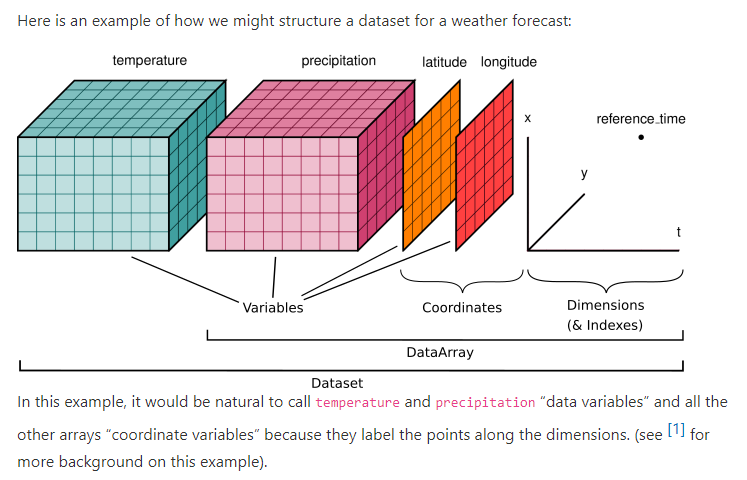

In [105]:
Image(filename="X_array.png")

In [117]:
temp = 15 + 8 * np.random.randn(2, 2, 3)

precip = 10 * np.random.rand(2, 2, 3)

lon = [[-99.83, -99.32], [-99.79, -99.23]]

lat = [[42.25, 42.21], [42.63, 42.59]]

ds = xr.Dataset(
     {
         "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
     },
     coords={
        "lon": (["x", "y"], lon),
         "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
          "reference_time": pd.Timestamp("2014-09-05"),
    },
)

ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 21.25 17.67 9.755 ... 26.59 16.97 8.297
    precipitation   (x, y, time) float64 0.925 0.7397 5.952 ... 4.716 3.549 7.18

In [118]:
xr.Dataset(dict(bar=foo))

<xarray.Dataset>
Dimensions:  (time: 6, space: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) <U2 'IA' 'IL' 'IN' 'IT'
Data variables:
    bar      (time, space) float64 0.2199 0.7095 0.5517 ... 0.6277 0.8135 0.7508

In [119]:
xr.Dataset(dict(bar=foo.to_pandas()))

<xarray.Dataset>
Dimensions:  (time: 6, space: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-06
  * space    (space) object 'IA' 'IL' 'IN' 'IT'
Data variables:
    bar      (time, space) float64 0.2199 0.7095 0.5517 ... 0.6277 0.8135 0.7508

## Dataset contents

In [120]:
"temperature" in ds

ds["temperature"]


<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[21.24587371, 17.67316084,  9.75524575],
        [12.90494724, 25.46072886, -1.40312588]],

       [[ 7.11896474, 19.22000526, 17.42477671],
        [26.59360691, 16.96966769,  8.29662577]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [122]:
ds.data_vars

Data variables:
    temperature    (x, y, time) float64 21.25 17.67 9.755 ... 26.59 16.97 8.297
    precipitation  (x, y, time) float64 0.925 0.7397 5.952 ... 4.716 3.549 7.18

In [124]:
ds.coords

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

In [125]:
 ds.attrs

{}

In [127]:
ds.attrs["title"] = "test"
ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 21.25 17.67 9.755 ... 26.59 16.97 8.297
    precipitation   (x, y, time) float64 0.925 0.7397 5.952 ... 4.716 3.549 7.18
Attributes:
    title:    test

In [130]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[21.24587371, 17.67316084,  9.75524575],
        [12.90494724, 25.46072886, -1.40312588]],

       [[ 7.11896474, 19.22000526, 17.42477671],
        [26.59360691, 16.96966769,  8.29662577]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

## Dictionary like methods

In [158]:
ds = xr.Dataset()

ds["temperature"] = (("x", "y", "time"), temp)

ds["temperature_double"] = (("x", "y", "time"), temp * 2)

ds["precipitation"] = (("x", "y", "time"), precip)

ds.coords["lat"] = (("x", "y"), lat)

ds.coords["lon"] = (("x", "y"), lon)

ds.coords["time"] = pd.date_range("2014-09-06", periods=3)

ds.coords["reference_time"] = pd.Timestamp("2014-09-05")

In [159]:
ds

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 21.25 17.67 9.755 ... 16.97 8.297
    temperature_double  (x, y, time) float64 42.49 35.35 19.51 ... 33.94 16.59
    precipitation       (x, y, time) float64 0.925 0.7397 5.952 ... 3.549 7.18

## Transforming datasets

In [160]:
ds[["temperature"]]

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 21.25 17.67 9.755 ... 26.59 16.97 8.297

In [161]:
ds[["temperature", "temperature_double"]]

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 21.25 17.67 9.755 ... 16.97 8.297
    temperature_double  (x, y, time) float64 42.49 35.35 19.51 ... 33.94 16.59

In [162]:
ds.drop_vars("temperature")

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 42.49 35.35 19.51 ... 33.94 16.59
    precipitation       (x, y, time) float64 0.925 0.7397 5.952 ... 3.549 7.18

In [163]:
ds.drop_dims("time")


<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [164]:
ds.assign(temperature2=2 * ds.temperature)

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 21.25 17.67 9.755 ... 16.97 8.297
    temperature_double  (x, y, time) float64 42.49 35.35 19.51 ... 33.94 16.59
    precipitation       (x, y, time) float64 0.925 0.7397 5.952 ... 3.549 7.18
    temperature2        (x, y, time) float64 42.49 35.35 19.51 ... 33.94 16.59

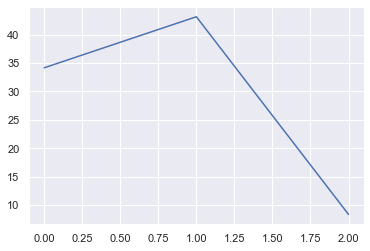

In [166]:
plt.plot((2 * ds.temperature.sel(x=0)).mean("y"));

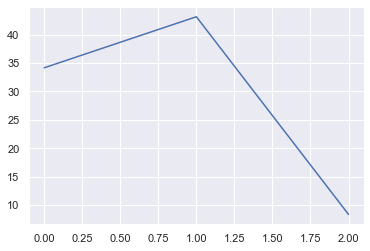

In [167]:
(ds.temperature.sel(x=0).pipe(lambda x: 2 * x).mean("y").pipe(plt.plot)); #same as before but "pipe" used

## Renaming variables

In [168]:
ds.rename({"temperature": "temp", "precipitation": "precip"})

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temp                (x, y, time) float64 21.25 17.67 9.755 ... 16.97 8.297
    temperature_double  (x, y, time) float64 42.49 35.35 19.51 ... 33.94 16.59
    precip              (x, y, time) float64 0.925 0.7397 5.952 ... 3.549 7.18

In [169]:
ds.coords["day"] = ("time", [6, 7, 8])

ds.swap_dims({"time": "day"})

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, day: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    time                (day) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
  * day                 (day) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, day) float64 21.25 17.67 9.755 ... 16.97 8.297
    temperature_double  (x, y, day) float64 42.49 35.35 19.51 ... 33.94 16.59
    precipitation       (x, y, day) float64 0.925 0.7397 5.952 ... 3.549 7.18

## Coordinates

In [188]:
 ds.coords

Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8

### Modifying coordinates

In [189]:
ds.reset_coords()

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 21.25 17.67 9.755 ... 16.97 8.297
    temperature_double  (x, y, time) float64 42.49 35.35 19.51 ... 33.94 16.59
    precipitation       (x, y, time) float64 0.925 0.7397 5.952 ... 3.549 7.18
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int32 6 7 8

In [190]:
ds.set_coords(["temperature", "precipitation"])

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    temperature         (x, y, time) float64 21.25 17.67 9.755 ... 16.97 8.297
    precipitation       (x, y, time) float64 0.925 0.7397 5.952 ... 3.549 7.18
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 42.49 35.35 19.51 ... 33.94 16.59

In [191]:
ds.coords

Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8

In [192]:
ds["temperature"].reset_coords(drop=True)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[21.24587371, 17.67316084,  9.75524575],
        [12.90494724, 25.46072886, -1.40312588]],

       [[ 7.11896474, 19.22000526, 17.42477671],
        [26.59360691, 16.96966769,  8.29662577]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

### Coordinates methods

In [197]:
ds.coords.to_dataset()

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [199]:
alt = xr.Dataset(coords={"z": [10], "lat": 0, "lon": 0})

alt

<xarray.Dataset>
Dimensions:  (z: 1)
Coordinates:
  * z        (z) int32 10
    lat      int32 0
    lon      int32 0
Data variables:
    *empty*

In [200]:
ds.coords.merge(alt.coords)

<xarray.Dataset>
Dimensions:         (time: 3, z: 1)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8
  * z               (z) int32 10
Data variables:
    *empty*

### Indexes

In [201]:
ds["time"].to_index()

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

In [202]:
 ds.indexes

time: DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

### MultiIndex coordinates

In [206]:
 midx = pd.MultiIndex.from_arrays(
     [["R", "R", "V", "V"], [0.1, 0.2, 0.7, 0.9]], names=("band", "wn")
 )

midx

MultiIndex([('R', 0.1),
            ('R', 0.2),
            ('V', 0.7),
            ('V', 0.9)],
           names=['band', 'wn'])

In [210]:
mda = xr.DataArray(np.random.rand(4), coords={"spec": midx}, dims="spec")

mda

<xarray.DataArray (spec: 4)>
array([0.5044707 , 0.15530774, 0.49390985, 0.61627363])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [211]:
mda["band"]

<xarray.DataArray 'band' (spec: 4)>
array(['R', 'R', 'V', 'V'], dtype=object)
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [212]:
 mda.wn

<xarray.DataArray 'wn' (spec: 4)>
array([0.1, 0.2, 0.7, 0.9])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9